# Projet - 3M236

In [1]:
import numpy as np
import approx_EDO as EDO
import matplotlib.pyplot as plt
import math
%matplotlib  inline

## 2 - Oscillateur de Duffing

La deuxieme partie de l'experience c'est modeliser l'oscillateur de Duffing. Cette oscilateur est la solution a le systeme de equations differentielles suivante.

$$\left\{
        \begin{array}{l}
            x'(t) = v(t) \\
            v'(t) = -\alpha x(t) - x^3(t) - \psi v(t) + Fcos(\omega t) \\
            x(0) = x_0 \\
            v(0) = v_0
        \end{array}
   \right.$$
   
La premier aproximation on va la faire en utilisant $\psi = 0$ et $F = 0$. 

### Energie du systeme

Avec $\psi = 0$ et $F = 0$ le systeme est le suivant:

$$\left\{
        \begin{array}{l}
            x'(t) = v(t) \\
            v'(t) = -\alpha x(t) - x^3(t)\\
            x(0) = x_0 \\
            v(0) = v_0
        \end{array}
   \right.$$

Comme dans le cas de pendule simple on a une fonction qui definit l'energie du système. Ici, la fonction qui modelise le systeme est:

$$ H(x,v) = \frac{1}{2}v^2 + \left( \frac{1}{4}x^4 + \frac{\alpha}{2}x^2 \right)$$

On a que $ t \mapsto H(x(t),v(t)) $  est constante pour $\psi = 0$ et $F = 0$.  En effet:

$$H'(x(t),v(t)) = 
\begin{pmatrix}
x^3(t) + \alpha x(t) & v(t)
\end{pmatrix}
\begin{pmatrix}
x'(t) \\
v'(t)
\end{pmatrix}
=x^3(t)v(t) + \alpha x(t)v(t) -\alpha x(t)v(t) -x^3(t)v(t) = 0 $$

Donc $H(x(t),v(t)) = cte.$ pour tout $t$ dans l'intervalle de definition.

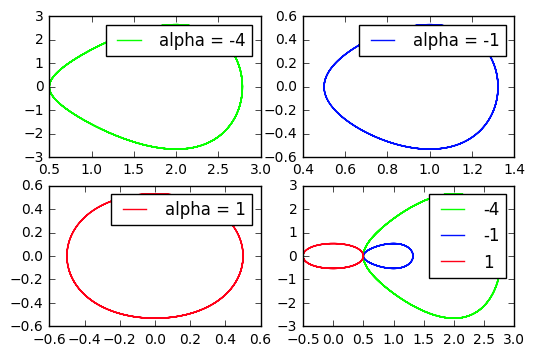

In [2]:
c_map = EDO.get_cmap(3)
alpha_vals = [-4, -1, 1] #differents valeurs de alpha
pos = 1
for alpha in alpha_vals:
    Gamma = [lambda v, t: v, lambda u, t: -alpha*u - u*u*u ] #Fonctions x' et v'
    t_, x_ = EDO.stormer_verlet(0,[0.5,0],0.001,20, Gamma) #Librerie EDO dans le même directoire que ce projet
    u = [x[0] for x in x_]
    v = [x[1] for x in x_]
    #Plot individuel de chaque courve
    plt.subplot(2,2,pos)
    plt.plot(u, v, color = c_map(pos))
    plt.legend(["alpha = %i"%alpha])
    #Plot de tout le courbes pour les comparer
    plt.subplot(2,2,4)
    plt.plot(u, v, color = c_map(pos))
    pos += 1

plt.legend(alpha_vals)

Pour different valeurs de alpha on a different ovoides.

### Compairaison avec euler explicite

Maintenant on va voir de differences d'erreur entre cet nouveau algorithme d'approximation et Euler Explicite que nous avions au premiere moment.

In [3]:
Gamma = [lambda v, t: v, lambda u, t: 4*u - u*u*u ]
f = lambda x,t:np.array([x[1], 4*x[0] - x[0]*x[0]*x[0]])
tEE_, xEE_ = EDO.euler_explicite(0,[0.5,0],0.001,20, f)
tSV_, xSV_ = EDO.stormer_verlet(0,[0.5,0],0.001,20, Gamma)

Pour voir quel algorithme est meilleur on va voir comme sont los espaces de phase et la quantité d'energie que perdre le systeme.

In [4]:
#On fait une fonction pour definir l'energie associé a chaque alpha pour ce problem de Cauchy
def define_H_for(alpha):
     return lambda x, v : 0.5*v*v + 0.25*x*x*x*x + 0.5*alpha*x*x

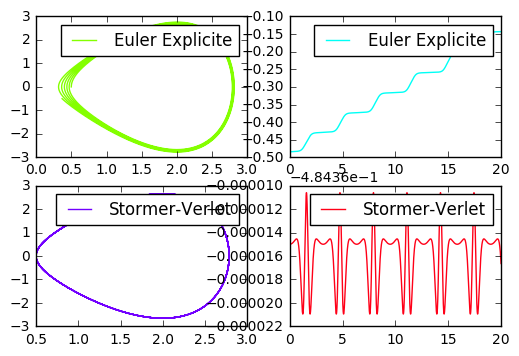

In [5]:
c_map = EDO.get_cmap(4)

H = define_H_for(-4) #On a H pour alpha = -4 comme on veut
uEE = [x[0] for x in xEE_]
vEE = [x[1] for x in xEE_]

plt.subplot(2,2,1)
plt.plot(uEE,vEE,color=c_map(1))
plt.legend(['Euler Explicite'])

plt.subplot(2,2,2)
H_ = [H(x[0],x[1]) for x in xEE_]
plt.plot(tEE_,H_,color=c_map(2))
plt.legend(['Euler Explicite'])

uSV = [x[0] for x in xSV_]
vSV = [x[1] for x in xSV_]

plt.subplot(2,2,3)
plt.plot(uSV,vSV,color=c_map(3))
plt.legend(['Stormer-Verlet'])

plt.subplot(2,2,4)
H_ = [H(x[0],x[1]) for x in xSV_]
plt.plot(tSV_,H_,color=c_map(4))
plt.legend(['Stormer-Verlet'])

On peut voir comme le methode de Euler Explicite n'approxime bien la solution et apres certain temps l'approximation est mauvais. Stormer-Verlet est capable d'approximmer mais ne respect pas que l'energie du systeme soit constante.

## Oscillateur amorti et non forcé

Avec $F = 0$ le systeme est le suivant:

$$\left\{
        \begin{array}{l}
            x'(t) = v(t) \\
            v'(t) = -\alpha x(t) - x^3(t) - \psi v(t)\\
            x(0) = x_0 \\
            v(0) = v_0
        \end{array}
   \right.$$
   
Pour differents valeurs de $\psi$ on voit que l'espace de phases est une espiral que tourne autour du point $ (1,0) $


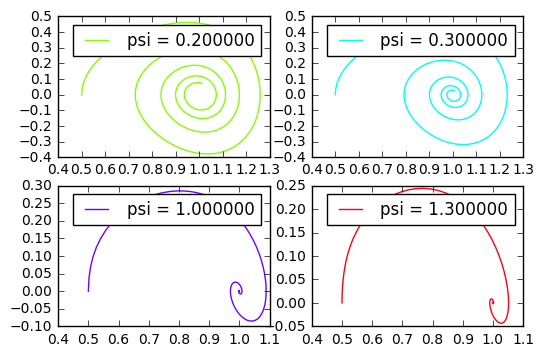

In [6]:
c_map = EDO.get_cmap(4)
psi_vals = [0.2,0.3,1,1.3] #differents valeurs de gamma
pos = 1
for psi in psi_vals:
    f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -psi*x[1]]) #Fonctions x' et v' alpha = -1
    t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,20,0.0001,f) #Librerie EDO dans le même directoire que ce projet
    u = [x[0] for x in x_]
    v = [x[1] for x in x_]
    
    #Plot individuel de chaque courve
    plt.subplot(2,2,pos)
    plt.plot(u, v, color = c_map(pos))
    plt.legend(["psi = %f"%psi])
    pos = pos +1

## Oscillateur amorti et forcé

Dans le cadre le plus general on va utiliser l'equation originel et l'etudier pour $ \psi = 0.1, \omega = 1.4$ et $ x_0 = (0,0) $ 

### Representation de la position pendant le temps

En premier lieu on represente la position du pendule pendant le temps $t in [0,500]

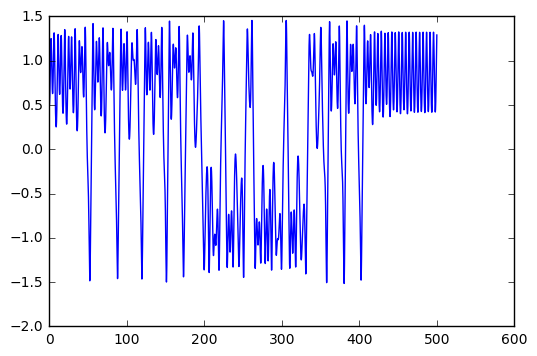

In [13]:
F = 0.29
omega = 1.4
T = 500
f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -0.1*x[1] + F*math.cos(omega*t)])
t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,T,0.0001,f) #Librerie EDO dans le même directoire que ce projet
u = [x[0] for x in x_]
v = [x[1] for x in x_]

plt.plot(t_,u)

On voit que le comportement est un peu chaotique.

### Limitation du rang d'étude

Aprés, on etude ou la position s'estabilise les temps appartenant a l'intervalle $[400,500]$

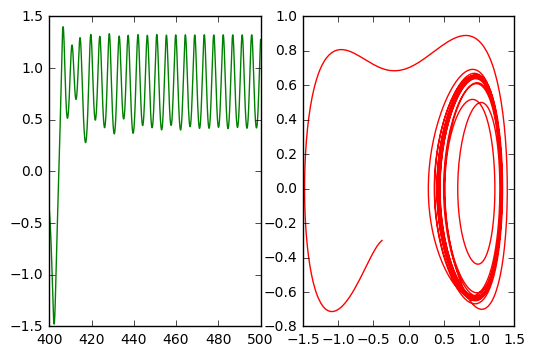

In [34]:
tg400, ug400, vg400 = separate_solutions(t_,u,v,400,500)
plt.subplot(121)
plt.plot(tg400,ug400,color = 'green')

plt.subplot(122)
plt.plot(ug400,vg400,color = 'red')

On peut observer que le comportement est plus proche a le comportement de l'oscillateur amorti et non forcé.

In [38]:
k = 2*math.pi/omega
intervalle = [T-k,T]

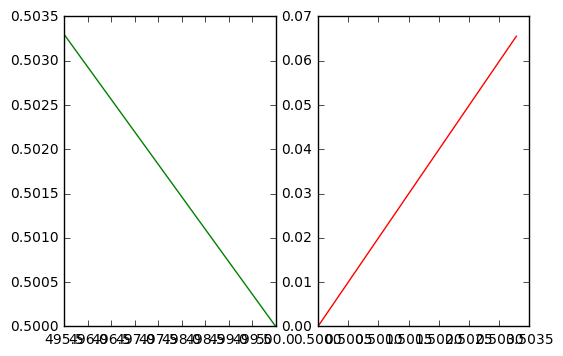

In [40]:
tk, uk, vk = separate_solutions(t_,u,v,intervalle[0],intervalle[1])

plt.subplot(121)
plt.plot(tk,uk,color = 'green')

plt.subplot(122)
plt.plot(uk,vk,color = 'red')

## Autres comportements pour données initialles differentes

On va utiliser maintenant $F = 0.32$ et $T = 1000$

In [42]:
F = 0.32
omega = 1.4
T = 1000
f = lambda x,t:np.array([x[1], x[0] - x[0]*x[0]*x[0] -0.1*x[1] + F*math.cos(omega*t)])
t_, x_ = EDO.RK23(0.1,[0.5,0],0.1,0.01,T,0.0001,f) #Librerie EDO dans le même directoire que ce projet
u = [x[0] for x in x_]
v = [x[1] for x in x_]

Comme on prevu que il tend vers un comportement periodique on etude le portrait de phase pour $t \in [T-100,T]$

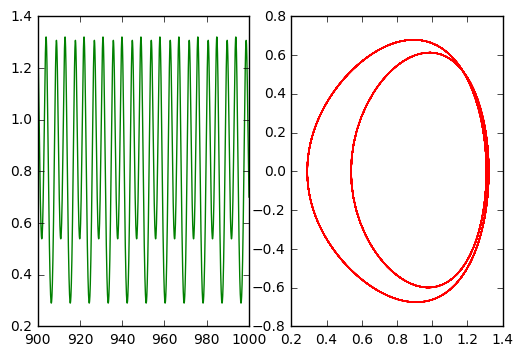

In [44]:
tg900, ug900, vg900 = separate_solutions(t_,u,v,900,1000)

plt.subplot(121)
plt.plot(tg900,ug900,color = 'green')

plt.subplot(122)
plt.plot(ug900,vg900,color = 'red')